In [1]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
META_DIR = Path('../data/fma_metadata')
AUDIO_DIR = Path('../data/fma_small')
CONVERTED_DIR = Path('../data/converted/rock_inst')

# Load and check npz files

In [3]:
npzfile = np.load(CONVERTED_DIR/'train_arr.npz')
X_train = npzfile['X']
y_train = npzfile['y']
print(X_train.shape, y_train.shape)

(1599, 640, 128) (1599,)


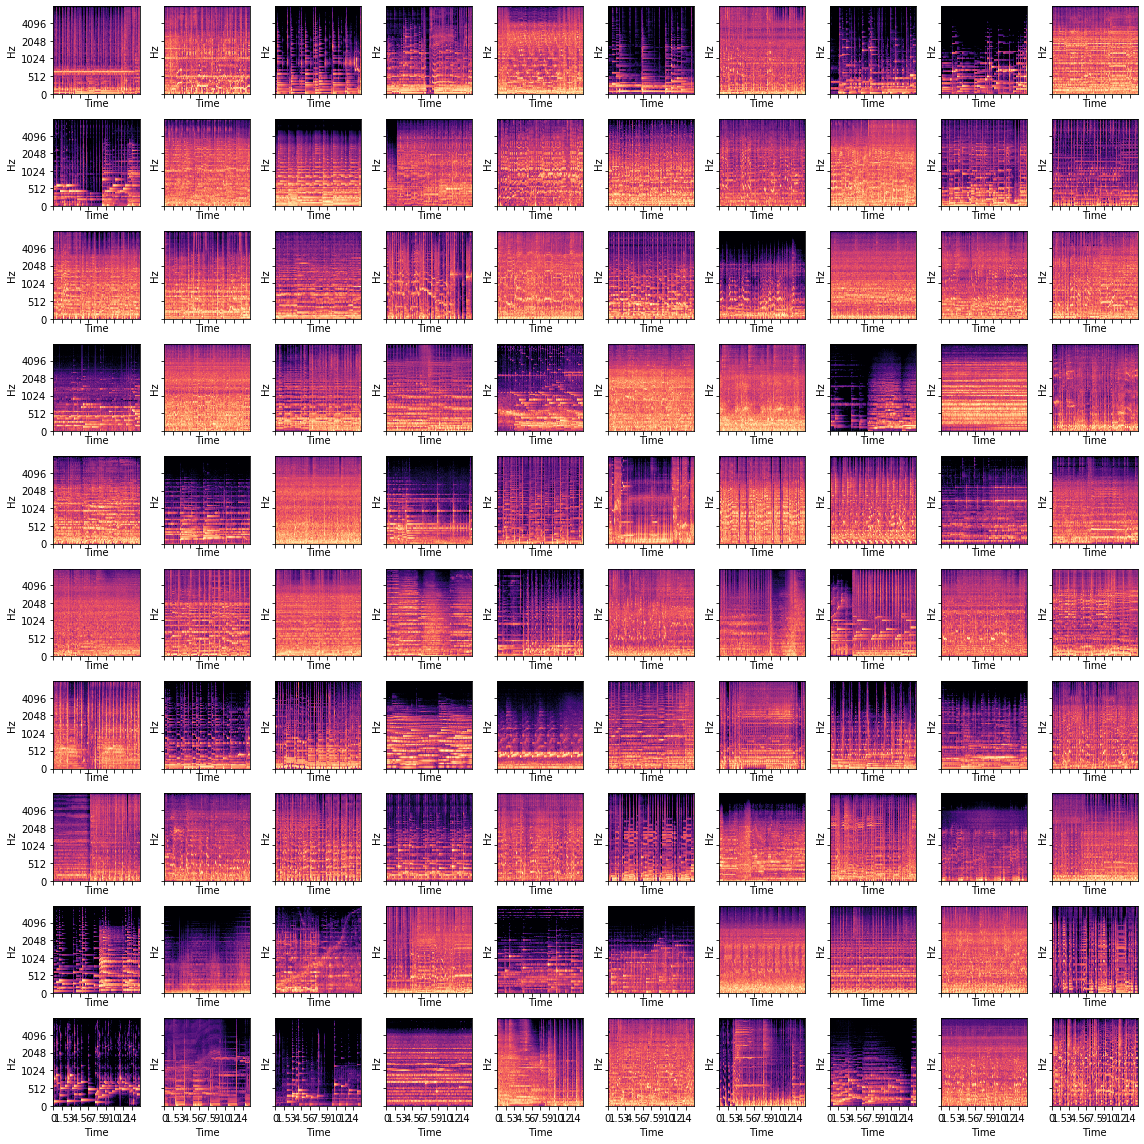

In [24]:
fig, axes = plt.subplots(10,10, figsize=(16,16), sharey=True, sharex=True)

for i, ax in enumerate(axes.flatten()):
    librosa.display.specshow(X_train[i].T, y_axis='mel', fmax=8000, x_axis='time', ax=ax)
plt.tight_layout()

In [21]:
X_train[0].min()

-80.0

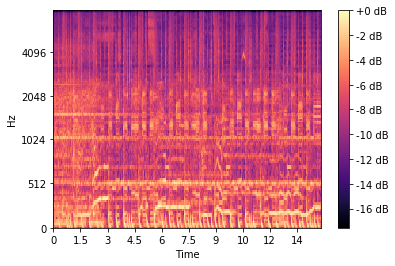

In [22]:
X_raw = librosa.core.db_to_power(X_train[1], ref=1.0)
X_log = np.log(X_raw)

librosa.display.specshow(X_log.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [16]:
X_log.min()

-17.55187437919029

# May need to concatenate and shuffle when adding new genres

In [1]:
# Example of concatenation
X_train = np.concatenate((X_train1, X_train2, X_train3, X_train4), axis = 0)
y_train = np.concatenate((y_train1, y_train2, y_train3, y_train4), axis = 0)
print(X_train.shape, y_train.shape)

NameError: name 'np' is not defined

In [2]:
def shuffle(X, y):
    assert len(X) == len(y)
    p = np.random.permutation(len(X))
    return X[p], y[p]

In [ ]:
# Example of shuffle
X_shuf, y_shuf = shuffle(X_train, y_train)